In [1]:
# importing library for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sql library
import sqlite3
# import text library for cleaning text data 
import re
# import  API library 
import flask
import flasgger
import seaborn as sns

In [2]:
data  =  pd.read_csv('data/data.csv', encoding = 'latin-1')
kamusalay = pd.read_csv('data/new_kamusalay.csv', encoding='latin-1', header=None)
abusive_dict = pd.read_csv('data/abusive.csv', encoding='latin-1', header=None)

In [3]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
data.duplicated().sum()

np.int64(125)

In [6]:
data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

# Data Visualization and Analysis

In [7]:
data.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

In [8]:
data.HS_Individual.value_counts()

HS_Individual
0    9594
1    3575
Name: count, dtype: int64

In [9]:
data.HS_Group.value_counts()

HS_Group
0    11183
1     1986
Name: count, dtype: int64

In [10]:
data.HS_Religion.value_counts()

HS_Religion
0    12376
1      793
Name: count, dtype: int64

In [11]:
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_8312\952601935.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='HS', data=data, palette =custom_colors)
C:\Users\user\AppData\Local\Temp\ipykernel_8312\952601935.py:19: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(ax=axes[0, 0], x='HS', data=data, palette =custom_colors)
C:\Users\user\AppData\Local\Temp\ipykernel_8312\952601935.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Abusive', data=data,palette =custom_colors)
C:\Users\user\AppData\Local\Temp\ipykernel_8312\952601935.py:26: UserWarning: The palette list has more values (4) than

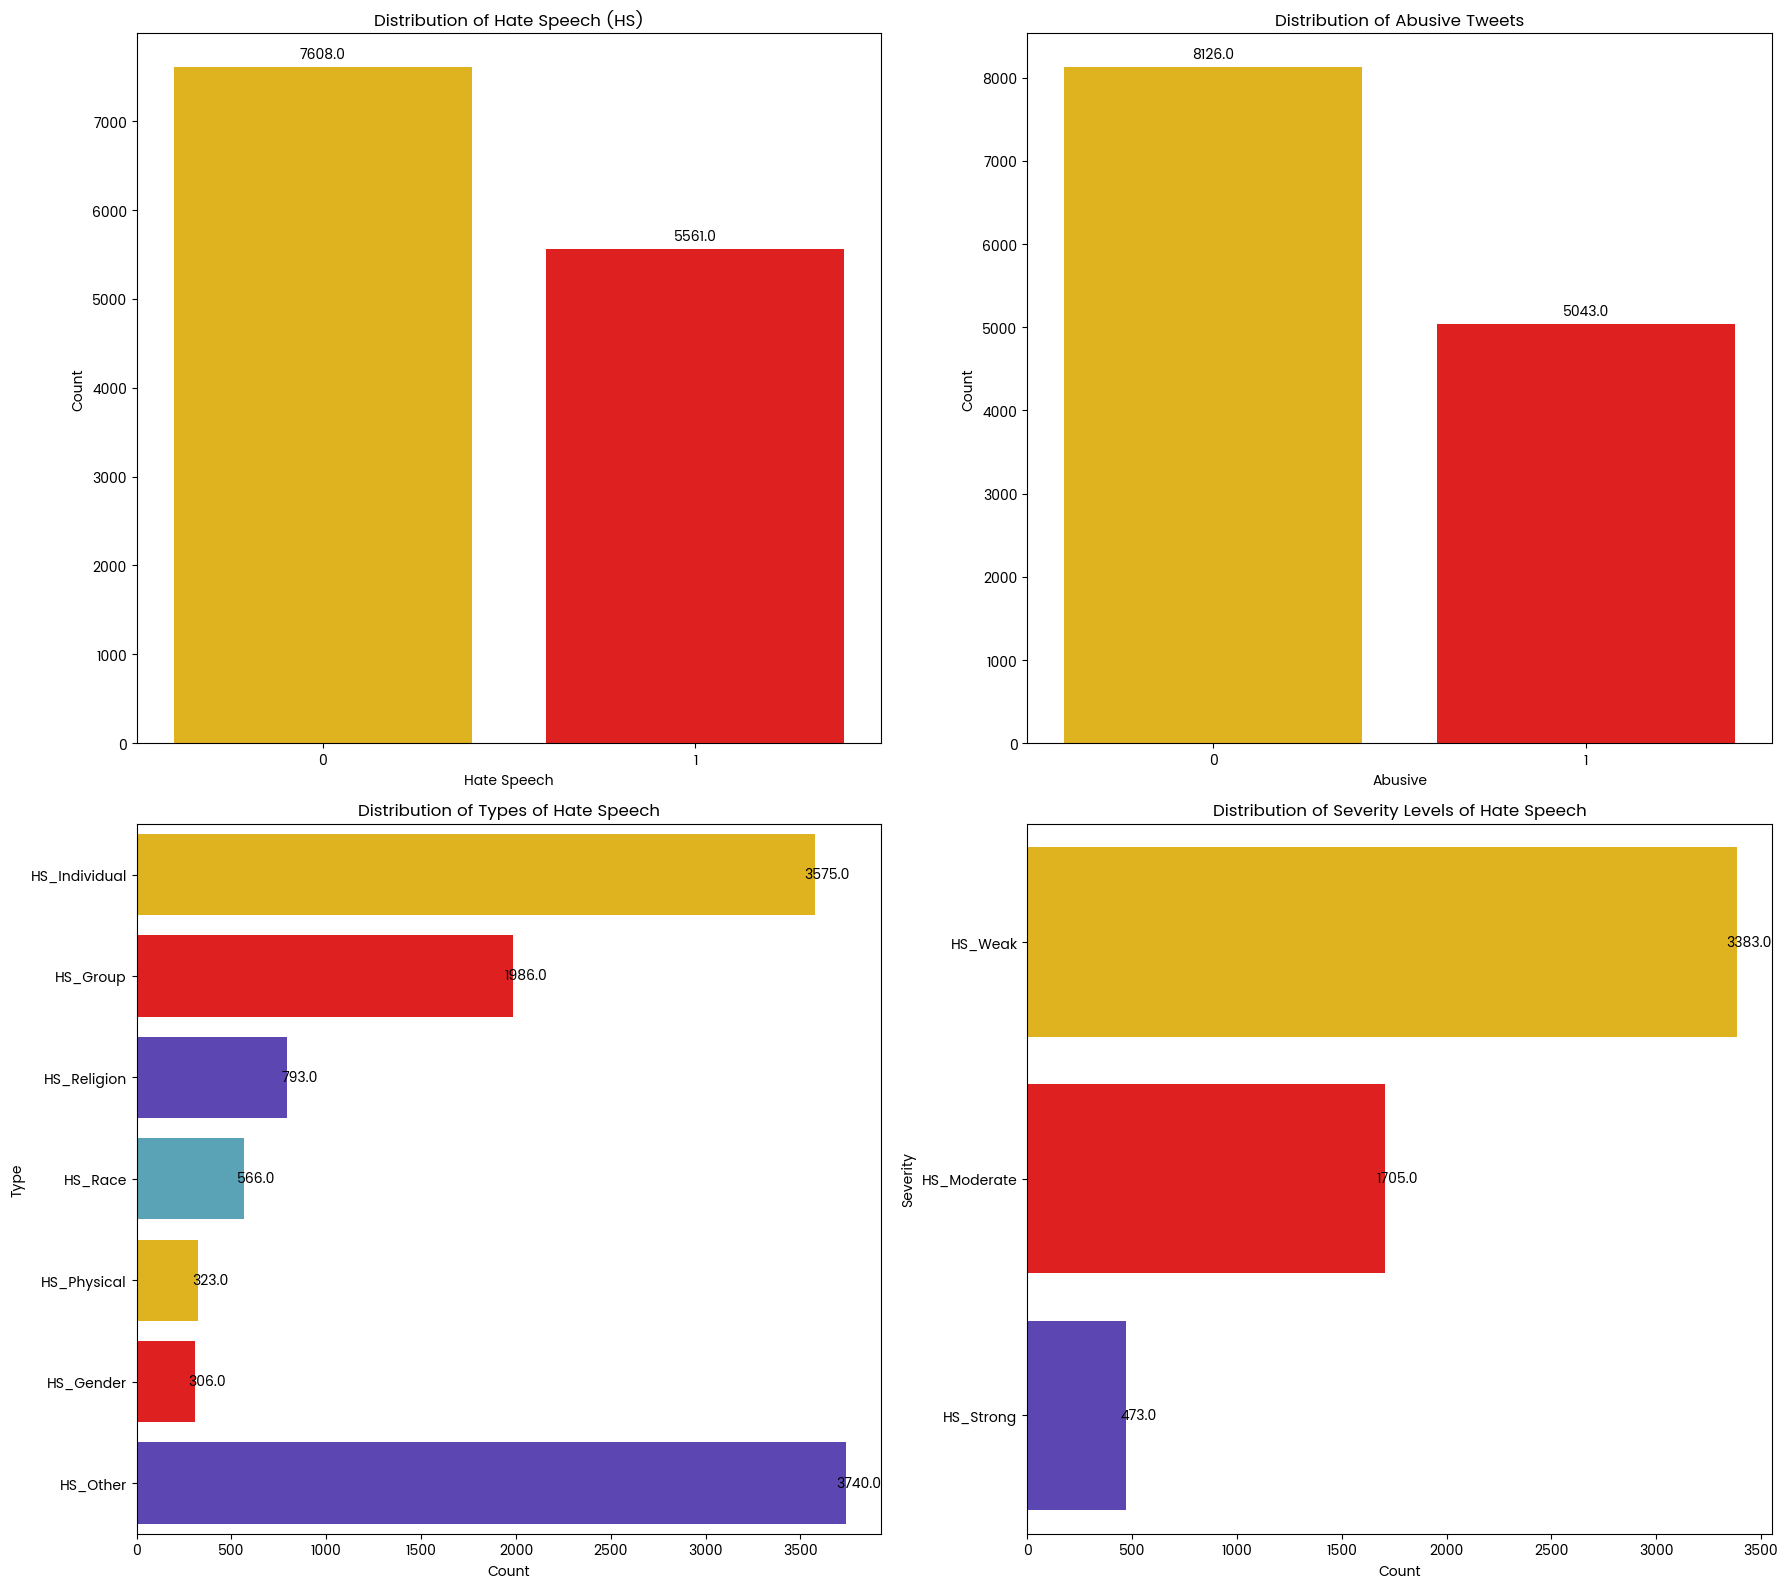

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Path to the Poppins font file (update this to the correct path)
font_path = 'C:/Users/user/Downloads/FONT REMA/Poppins-Black.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
font_manager.fontManager.addfont(font_path)

# Set the font globally
plt.rcParams['font.family'] = font_prop.get_name()

# Set up the figure and axis
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

custom_colors = ['#FFC300', '#FF0000','#5034C4', '#4BACC6']

# Plot 1: Distribution of Hate Speech (HS) and Abusive tweets
sns.countplot(ax=axes[0, 0], x='HS', data=data, palette =custom_colors)
axes[0, 0].set_title('Distribution of Hate Speech (HS)')
axes[0, 0].set_xlabel('Hate Speech')
axes[0, 0].set_ylabel('Count')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

sns.countplot(ax=axes[0, 1], x='Abusive', data=data,palette =custom_colors)
axes[0, 1].set_title('Distribution of Abusive Tweets')
axes[0, 1].set_xlabel('Abusive')
axes[0, 1].set_ylabel('Count')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Plot 2: Distribution of types of Hate Speech
hs_types = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
hs_counts = data[hs_types].sum().reset_index()
hs_counts.columns = ['Type', 'Count']
sns.barplot(ax=axes[1, 0], x='Count', y='Type', data=hs_counts,palette =custom_colors)
axes[1, 0].set_title('Distribution of Types of Hate Speech')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Type')
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')

# Plot 3: Distribution of severity levels of Hate Speech
hs_severity = ['HS_Weak', 'HS_Moderate', 'HS_Strong']
severity_counts = data[hs_severity].sum().reset_index()
severity_counts.columns = ['Severity', 'Count']
sns.barplot(ax=axes[1, 1], x='Count', y='Severity', data=severity_counts,palette =custom_colors)
axes[1, 1].set_title('Distribution of Severity Levels of Hate Speech')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Severity')
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Store Cleaned Data from API to sqlite3

In [3]:
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('D:/Rema Workspace/portofolio_data/binar_challenge/database/tweets.db')
c = conn.cursor()

# Create table
c.execute('''
    CREATE TABLE IF NOT EXISTS tweets (
        Tweet TEXT, 
        HS INTEGER, 
        Abusive INTEGER, 
        HS_Individual INTEGER, 
        HS_Group INTEGER, 
        HS_Religion INTEGER, 
        HS_Race INTEGER, 
        HS_Physical INTEGER, 
        HS_Gender INTEGER, 
        HS_Other INTEGER, 
        HS_Weak INTEGER, 
        HS_Moderate INTEGER, 
        HS_Strong INTEGER
    )
''')

# Commit the changes and close the connection
conn.commit()
conn.close()

In [5]:
import json

# Load the JSON data
with open('D:/Rema Workspace/portofolio_data/binar_challenge/Cleaned_Tweet_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract the data
tweets = data['data']

# Prepare the data for insertion
rows = [(tweet,) + (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) for tweet in tweets]  # Adjust the values as necessary


In [7]:
# Reconnect to the database
conn = sqlite3.connect('D:/Rema Workspace/portofolio_data/binar_challenge/database/tweets.db')
c = conn.cursor()

# Insert the data
c.executemany('''
    INSERT INTO tweets (
        Tweet, HS, Abusive, HS_Individual, HS_Group, 
        HS_Religion, HS_Race, HS_Physical, HS_Gender, 
        HS_Other, HS_Weak, HS_Moderate, HS_Strong
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
''', rows)

# Commit the changes and close the connection
conn.commit()
conn.close()